In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score

In [2]:
df_trans = pd.read_csv('transfusion.data')


In [3]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
df_trans.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


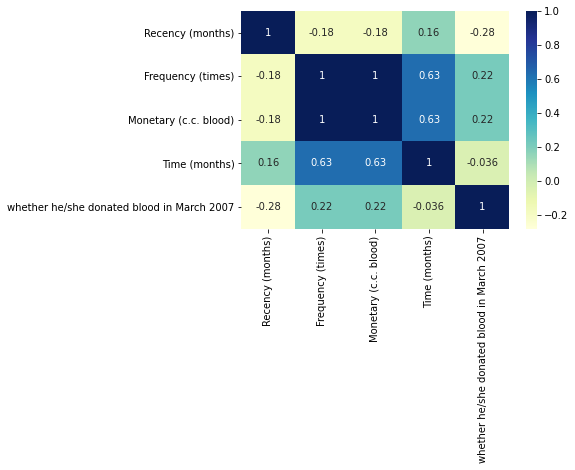

In [5]:
import seaborn as sns
correlations = df_trans[df_trans.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [6]:
X = df_trans.iloc[:,:-1].values
y = df_trans.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state =10)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
def model_selection(X_train, y_train):
  classifier_Logistic = LogisticRegression(random_state = 0).fit(X_train, y_train).predict(X_test)
  classifier_NB = GaussianNB().fit(X_train, y_train).predict(X_test)
  classifier_tree = DecisionTreeClassifier(criterion='gini',random_state = 0).fit(X_train,y_train).predict(X_test)
  classifier_SVC = SVC(kernel='rbf', random_state = 0).fit(X_train,y_train).predict(X_test)
  classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train,y_train).predict(X_test)
  classifier_RF = RandomForestClassifier(n_estimators = 150, criterion = 'gini', random_state = 0).fit(X_train,y_train).predict(X_test)
  classifiers = [classifier_Logistic, classifier_NB,classifier_tree,classifier_SVC,classifier_KNN, classifier_RF ]
  return classifiers


In [41]:
classifier = model_selection(X_train, y_train)

In [42]:
def metrics(classifier):
  cm = confusion_matrix(y_test, classifier)
  rs = recall_score(y_test, classifier)
  ps = precision_score(y_test, classifier)
  acc= accuracy_score(y_test, classifier)
  

  print(cm, rs,ps, acc*100)
  

In [43]:
for cl in classifier:
  metrics(cl)


[[114   1]
 [ 29   6]] 0.17142857142857143 0.8571428571428571 80.0
[[111   4]
 [ 26   9]] 0.2571428571428571 0.6923076923076923 80.0
[[102  13]
 [ 26   9]] 0.2571428571428571 0.4090909090909091 74.0
[[114   1]
 [ 30   5]] 0.14285714285714285 0.8333333333333334 79.33333333333333
[[110   5]
 [ 25  10]] 0.2857142857142857 0.6666666666666666 80.0
[[107   8]
 [ 26   9]] 0.2571428571428571 0.5294117647058824 77.33333333333333


In [44]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
import keras
model = Sequential()
model.add(Dense(units = 32, activation = 'relu' ))
model.add(Dropout(0.2))

model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 32, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 ,activation='sigmoid'))

opt = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer= opt,  loss = 'binary_crossentropy', metrics= ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32 , epochs=100 )
print(history.history.keys())

Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7030 - accuracy: 0.5000 - val_loss: 0.6440 - val_accuracy: 0.7733
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7241 - val_loss: 0.5979 - val_accuracy: 0.7667
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7592 - val_loss: 0.5651 - val_accuracy: 0.7667
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7575 - val_loss: 0.5408 - val_accuracy: 0.7667
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7559 - val_loss: 0.5198 - val_accuracy: 0.7667
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7642 - val_loss: 0.5054 - val_accuracy: 0.7667
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7575 - val_loss: 0.4940 - val_accuracy: 0.7667
Epoch 8/100
1

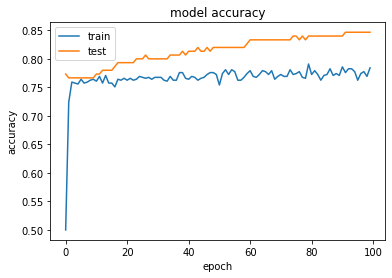

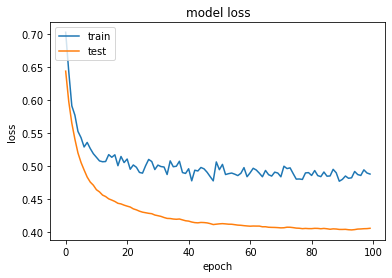

In [45]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()